# Session 1

## Image processing: Overview and applications 

**Overview**

Image processing is a kind of signal processing in which the input signal is the image itself and the output can be either a variant of it or a piece of information associated with it. Image processing is interested in raw image enhancments via tuning its parameters or applying different filters. When you are doing image processing you are performing tasks such as sharpening, smoothing, bluring, correcting illumination, etc. It can be either an independent task or preprocessing part of a larger task.

**What's an image**

A digital image can be represented as a matrix with hight and width. Each element in the matrix is a pixel value that possesses spatial information (row and column location) and color value.

The pixel sptial information holds its position in the matrix; e.g: pixel (5, 3) lies in the fifth row and the third column.

<img src="./images/pixel_rep.png" hight= "400" width="400"/>

The pixel value iteself represents its colour that can differ according to the colour representation. There are various representations such as:

- Grayscale (the example above): A pixel is an integer with a value between 0 to 255 (0 is completely black, 255 is completely white and the mid values are gray shades).
- RGB: A pixel is made up of 3 integers between 0 to 255 (the integers represent the intensity of red, green, and blue).


<img src="./images/rgb.png" />

**Applications**

Image processing manipulates image information in various ways that result in different missions. For example:
- Manipulate pixels count: Quantization, sampling
- Manipulate hight and width: resizing, cropping
- Manipulate pixels relative poisiotns: transitions, shear, rotation
- Manipulate pixel values: Dilation, Sharpening, colour conversion, enhancements
- Manipulate associated pixels: contouring, edge detection

All of those operations and more can be represented as matrix operations. To deal with that we can utilize softwares like Matlab, OpenCV or Scikit-Image.

## OpenCV Tutorial

According to Wikipedia, OpenCV is a library of programming functions mainly aimed at real-time computer vision. Originally developed by Intel, it was later supported by Willow Garage then Itseez. The library is cross-platform and free for use under the open-source Apache 2 License.

> what you actually need to know about openCV: fast, light, open source, python api

So, to get started, you can install open cv python using: `pip install opencv-python`. Then the module name to be imported is `cv2`

In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

### Reading, writing and displaying images

In [47]:
img = cv2.imread('./images/coffee.jpg') #takes the image path

In [48]:
type(img)

numpy.ndarray

In [49]:
img.shape

(184, 274, 3)

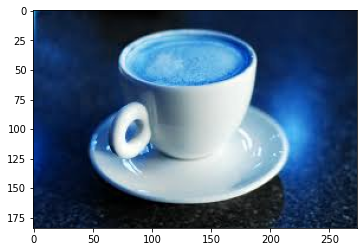

In [50]:
plt.imshow(img)
plt.show()

In [51]:
cv2.imshow('Coffee', img)
cv2.waitKey()
cv2.destroyAllWindows()

OpenCV utilizes BGR instead of RGB. so let's convert it using `cv2.cvtColor`

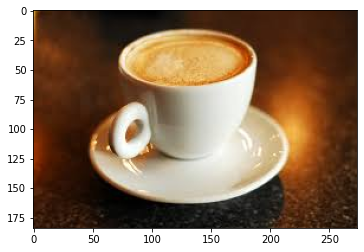

In [52]:
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img)
plt.show()

In [61]:
img2 = img.copy()
img2[:, :, [1,2]] = 0 #(r,g,b) --> (0,1,2)

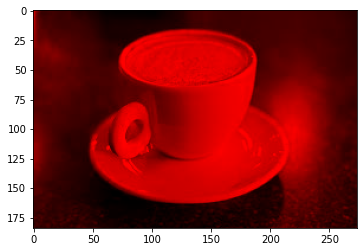

In [62]:
plt.imshow(img2)

In [65]:
cv2.imwrite('./images/coffee_red.jpg', cv2.cvtColor(img2, cv2.COLOR_RGB2BGR))

True

### Grayscaling

Grayscaling is converting image coloured image (e.g. RGB) to shades of grey (black & white) as it captures illumination information rather than the colour itself. One of many uses is processing images faster.

According to openCV documentation, it performs the following combination to get the grayscale pixel value:

`Y = 0.299 R + 0.587 G + 0.114 B`

In [71]:
img2 = img.copy()

In [72]:
img2.shape

(184, 274, 3)

In [73]:
img2 = cv2.cvtColor(img2, cv2.COLOR_RGB2GRAY)

In [74]:
img2.shape

(184, 274)

In [76]:
#alternative -> specify the flag for the readmode to be 0 : Grayscale
# img2 = cv2.imread("./images/coffee.jpg", 0)
cv2.imshow('GrayCoffee', img2)
cv2.waitKey()
cv2.destroyAllWindows()

In [86]:
# `Y = 0.299 R + 0.587 G + 0.114 B`
round(0.299 * img[0,0,0] + 0.587 * img[0,0,1] + 0.114 * img[0,0,2])

176

In [87]:
img2[0, 0]

176

### Histogram [link](https://en.wikipedia.org/wiki/Histogram_equalization#Implementation)

**cv2.calcHist(images, channels, mask, histSize, ranges[, hist[, accumulate]])**

- images : it is the source image, it should be given in square brackets
- channels : it is also given in square brackets. It is the index of channel for which we calculate histogram. For example, if input is grayscale image, its value is [0]. For color image, you can pass [0], [1] or [2] to calculate histogram of blue, green or red channel respectively.
- mask : mask image. To find histogram of full image, it is given as "None". But if you want to find histogram of particular region of image, you have to create a mask image for that and give it as mask. (I will show an example later.)
- histSize : this represents our BIN count. Need to be given in square brackets. For full scale, we pass [256].
- ranges : this is our RANGE. Normally, it is [0,256].

In [99]:
img = cv2.imread('./images/low_light.jpg',0)

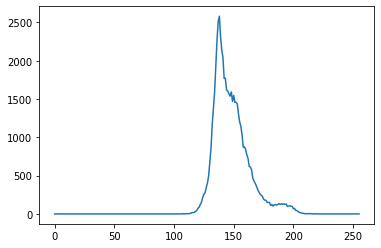

In [105]:
histogram = cv2.calcHist([img], [0], None, [256], [0, 256])
plt.plot(histogram)

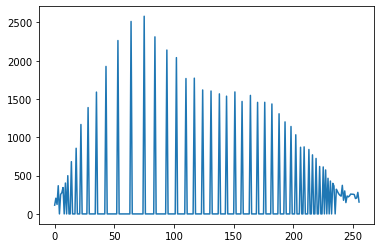

In [106]:
equ = cv2.equalizeHist(img)
histogram = cv2.calcHist([equ], [0], None, [256], [0, 256])
plt.plot(histogram)

In [107]:
cv2.imshow('Before', img)
cv2.imshow('After', equ)
cv2.waitKey()
cv2.destroyAllWindows()

### Drawing images

In [108]:
img = cv2.imread("./images/coffee.jpg", -1)
img[:, :, 0].shape

(184, 274)

**Lines** `cv2.line(image, start_point, end_point, color, thickness) --> returns image`

Can you notice the order of the start point? (x,y) coordinates

In [155]:
img2 = img.copy()
cv2.line(img2, (0,0), (137, 92), (120,200,165), 2)

cv2.imshow("Blue Line", img2)
cv2.waitKey(0)
cv2.destroyAllWindows()

**Rectangle** `cv2.rectangle(image, starting vertex, opposite vertex, color, thickness) --> returns image`

In [156]:
img2 = img.copy()
cv2.rectangle(img2, (40,10), (220, 170), (0,0,0), -1)


cv2.imshow("Rect", img2)
cv2.waitKey(0)
cv2.destroyAllWindows()

**Circles** `cv2.cirlce(image, center, radius, color, thickness) --> returns image`

In [166]:
img2 = img.copy()
cv2.circle(img2, (int(img2.shape[1]/2), int(img2.shape[0]/2)), 90, (0,0,0), -1)


cv2.imshow("Rect", img2)
cv2.waitKey(0)
cv2.destroyAllWindows()

**Excercise**

Try `cv2.polylines(image, [pts], isClosed, color, thickness)`

Try `thickness = -1`


In [167]:
pts = np.array([[25, 70], [25, 160], [110, 20]],
               np.int32)
               
print(pts.shape)

# # Let's now reshape our points in form  required by polylines
pts = pts.reshape((-1,1,2))
print(pts.shape)

(3, 2)
(3, 1, 2)


In [168]:
img2 = img.copy()
cv2.polylines(img2, [pts], 1, (0,0,0), 3)


cv2.imshow("Rect", img2)
cv2.waitKey(0)
cv2.destroyAllWindows()

**Text**

`cv2.putText(image, 'Text to Display', bottom left starting point, Font, Font Size, Color, Thickness)`

FONT_HERSHEY_SIMPLEX, FONT_HERSHEY_PLAIN, FONT_HERSHEY_DUPLEX,FONT_HERSHEY_COMPLEX, [more](https://docs.opencv.org/4.x/d6/d6e/group__imgproc__draw.html)

In [172]:
img2 = img.copy()
cv2.putText(img2, 'Latte', (50,180), cv2.FONT_HERSHEY_SCRIPT_COMPLEX, 2, (204, 174, 136), 2)
cv2.imshow("Text", img2)
cv2.waitKey(0)
cv2.destroyAllWindows()

### Translation, Rotation, Scaling

**Translation**

`cv2.warpAffine(Source, Transformation, (Destination)`

More about transformation matrices [here](https://en.wikipedia.org/wiki/Transformation_matrix) & [here](https://docs.opencv.org/3.4/d4/d61/tutorial_warp_affine.html)

In [191]:
# T is our translation matrix
T = np.float32([[1, 0, 150], [0, 1, 150]])

img2 = cv2.warpAffine(img, T, (int(img.shape[1]*2), int(img.shape[0]*2)))
cv2.imshow('Translation', img2)
cv2.waitKey()
cv2.destroyAllWindows()

**Rotation**

`cv2.getRotationMatrix2D(new_center_x, new_center_y, angle of rotation, scale)`

In [192]:
img.shape

(184, 274, 3)

In [223]:
# Divide by two to rototate the image around its centre
rotation_matrix = cv2.getRotationMatrix2D((274/2, 184/2), 90, 1)
rotation_matrix

array([[ 6.123234e-17,  1.000000e+00,  4.500000e+01],
       [-1.000000e+00,  6.123234e-17,  2.290000e+02]])

In [224]:
rotated_image = cv2.warpAffine(img, rotation_matrix,(img.shape[0], img.shape[1]))

cv2.imshow('Rotated Image', rotated_image)
cv2.waitKey()
cv2.destroyAllWindows()

In [215]:
rotated_image = cv2.transpose(img)

cv2.imshow('Rotated Image', rotated_image)
cv2.waitKey()
cv2.destroyAllWindows()

Can you notice the difference?

In [228]:
# 0 --> x-axis flip , 1 -->  y-axis flip
flipped = cv2.flip(img, 1)
cv2.imshow('Flip', flipped) 
cv2.waitKey()
cv2.destroyAllWindows()

**Scaling** 

`cv2.resize(image, dsize(output image size), x scale, y scale, interpolation)`

More on interpolation [here](https://stackoverflow.com/questions/3112364/how-do-i-choose-an-image-interpolation-method-emgu-opencv)

In [229]:
# Let's make our image 3/4 of it's original size
image_scaled = cv2.resize(img, None, fx=0.75, fy=0.75)
cv2.imshow('Scaling - Linear Interpolation', image_scaled) 
cv2.waitKey()
cv2.destroyAllWindows()

# Let's double the size of our image
img_scaled = cv2.resize(img, None, fx=2, fy=2, interpolation = cv2.INTER_CUBIC)
cv2.imshow('Scaling - Cubic Interpolation', img_scaled)
cv2.waitKey()
cv2.destroyAllWindows()

# Let's skew the re-sizing by setting exact dimensions
img_scaled = cv2.resize(img, (900, 400), interpolation = cv2.INTER_AREA)
cv2.imshow('Scaling - Skewed Size', img_scaled) 
cv2.waitKey()
cv2.destroyAllWindows()

**Exercise**

implement cropping operation

*hint*: Think of matrix slicing

### Image Pyramids

Useful when scaling images in object detection as:
- the object still has its information in smaller images
- increasing the robustness to detect objects in different image scales

more about upsampling, downsampling techniques [here](https://en.wikipedia.org/wiki/Pyramid_(image_processing))

<img src="./images/Image_pyramid.svg.png" hight= "400" width="400"/>

In [231]:
smaller = cv2.pyrDown(img)
larger = cv2.pyrUp(smaller)

cv2.imshow('Original', img)
cv2.imshow('Smaller ', smaller )
cv2.imshow('Larger ', larger )
cv2.waitKey(0)
cv2.destroyAllWindows()

### Arithmetic Operations &  Bitwise Operations

**Arithmetic Operations**

In [233]:
img = cv2.imread('images/Trump.jpg', 0)

# Create a matrix of ones, then multiply it by a scaler 
# This gives a matrix with same dimesions of our image with all values being the scalar value
M = np.ones(img.shape, dtype = "uint8") * 175

# We use this to add this matrix M, to our image
# Notice the increase in brightness
added = cv2.add(img, M)
cv2.imshow("Added", added)

# Likewise we can also subtract
# Notice the decrease in brightness
subtracted = cv2.subtract(img, M)
cv2.imshow("Subtracted", subtracted)

cv2.waitKey(0)
cv2.destroyAllWindows()

**Bitwise Operations**

In [234]:
# Making a sqare
square = np.zeros((300, 300), np.uint8)
cv2.rectangle(square, (50, 50), (250, 250), 255, -2)
cv2.imshow("Square", square)
cv2.waitKey(0)

# Making a ellipse
ellipse = np.zeros((300, 300), np.uint8)
cv2.ellipse(ellipse, (150, 150), (150, 150), 30, 0, 180, 255, -1)
cv2.imshow("Ellipse", ellipse)
cv2.waitKey(0)

cv2.destroyAllWindows()

In [235]:
# Shows only where they intersect
And = cv2.bitwise_and(square, ellipse)
cv2.imshow("AND", And)
cv2.waitKey(0)

# Shows where either square or ellipse is 
bitwiseOr = cv2.bitwise_or(square, ellipse)
cv2.imshow("OR", bitwiseOr)
cv2.waitKey(0) 

# Shows where either exist by itself
bitwiseXor = cv2.bitwise_xor(square, ellipse)
cv2.imshow("XOR", bitwiseXor)
cv2.waitKey(0)

# Shows everything that isn't part of the square
bitwiseNot_sq = cv2.bitwise_not(square)
cv2.imshow("NOT - square", bitwiseNot_sq)
cv2.waitKey(0)

### Notice the last operation inverts the image totally

cv2.destroyAllWindows()

### Thresholding, Binarization & Adaptive Thresholding

In thresholding, we convert a grey scale image to it's binary form.

In [238]:
image = cv2.imread('images/gradient.jpg',0)
cv2.imshow('Original', image)
cv2.waitKey(0)
cv2.destroyAllWindows()

# Values below 127 goes to 0 (black, everything above goes to 255 (white)
ret,thresh1 = cv2.threshold(image, 127, 255, cv2.THRESH_BINARY)
cv2.imshow('1 Threshold Binary', thresh1)
cv2.waitKey(0)
cv2.destroyAllWindows()

# Values below 127 go to 255 and values above 127 go to 0 (reverse of above)
ret,thresh2 = cv2.threshold(image, 127, 255, cv2.THRESH_BINARY_INV)
cv2.imshow('2 Threshold Binary Inverse', thresh2)
cv2.waitKey(0)
cv2.destroyAllWindows()

# Values above 127 are truncated (held) at 127 (the 255 argument is unused)
ret,thresh3 = cv2.threshold(image, 127, 255, cv2.THRESH_TRUNC)
cv2.imshow('3 THRESH TRUNC', thresh3)
cv2.waitKey(0)
cv2.destroyAllWindows()

# Values below 127 go to 0, above 127 are unchanged  
ret,thresh4 = cv2.threshold(image, 127, 255, cv2.THRESH_TOZERO)
cv2.imshow('4 THRESH TOZERO', thresh4)
cv2.waitKey(0)
cv2.destroyAllWindows()

# Resever of above, below 127 is unchanged, above 127 goes to 0
ret,thresh5 = cv2.threshold(image, 127, 255, cv2.THRESH_TOZERO_INV)
cv2.imshow('5 THRESH TOZERO INV', thresh5)
cv2.waitKey(0)
cv2.destroyAllWindows()

Is there a better way off thresholding? The biggest downfall of those simple threshold methods is that we need to provide the threshold value (i.e. the 127 value we used previously).

What if there was a smarter way of doing this?

There is with, Adaptive thresholding. More about thresholding techniques [here])(https://docs.opencv.org/4.x/d7/d4d/tutorial_py_thresholding.html)

### Filtering Colour

In [239]:
img = cv2.imread("./images/Sunflowers.jpg")

In [240]:
image_hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)

lower = np.array([22, 93, 0], dtype="uint8")
upper = np.array([45, 255, 255], dtype="uint8")

mask = cv2.inRange(image_hsv, lower, upper)

In [242]:
res = cv2.bitwise_and(img,img, mask= mask)

cv2.imshow('Original', img)  
cv2.imshow('mask', mask)
cv2.imshow('Filtered Color Only', res)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [ ]:
inv_mask = cv2.bitwise_not(mask)
res = cv2.bitwise_and(img,img, mask= inv_mask)

cv2.imshow('Original', img)
cv2.imshow('inv_mask', inv_mask)
cv2.imshow('Filtered Color Out', res)
cv2.waitKey(0)
cv2.destroyAllWindows()

## Task 1

Do you know the famous camscanner app? You can use it as an image scanner getting high quality images with the correct prespective./

<img src="./images/scan.jpg" hight= "300" width= "300"/>


You are asked to do the following operations over the `scan.jpg` image ablove:

    - Get the correct prespective
    - Convert it to binary (black and white) using thresholding on grayscaled image

For the first task, you can first the utilize the following information to use `cv2.getPerspectiveTransform` and `cv2.warpPerspective`

Cordinates of the 4 corners of the original image --> points_A = np.float32([[320,15], [700,215], [85,610], [530,780]]) *`can you get them interactively by mouse clicks?`*

Cordinates of the 4 corners of the desired output using a ratio of an A4 Paper 1 : 1.41 --> points_B = np.float32([[0,0], [420,0], [0,594], [420,594]])

In [ ]:
## TODO

## Sources 

- Hands-On Machine Learning with Scikit-Learn, Keras and TensorFlow by Aurélien Géron (O’Reilly). Copyright 2019 Aurélien Géron, 978-1-492-03264-9
- http://introtodeeplearning.com/
- https://course.fast.ai/
- https://pyimagesearch.com/
- https://sisu.ut.ee/imageprocessing/book/6
- https://www.simplilearn.com/image-processing-article
- https://pythonprogramming.net/color-filter-python-opencv-tutorial/
- https://www.analyticsvidhya.com/blog/2021/05/image-processing-using-opencv-with-practical-examples/#h2_11